In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns

In [4]:
data = pd.read_csv('../data/churn_train.csv')

In [6]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [11]:
nona = data.dropna()

In [42]:
print('iPhone: {}'.format(sum(np.where(nona.phone == 'iPhone',1,0))))
print('Android: {}'.format(sum(np.where(nona.phone == 'Android',1,0))))

iPhone: 23438
Android: 9694


In [39]:
nona.phone.unique()

array(['Android', 'iPhone'], dtype=object)

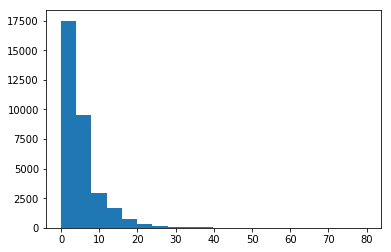

In [46]:
plt.hist(nona.avg_dist, bins = 20);

NameError: name 'axvline' is not defined

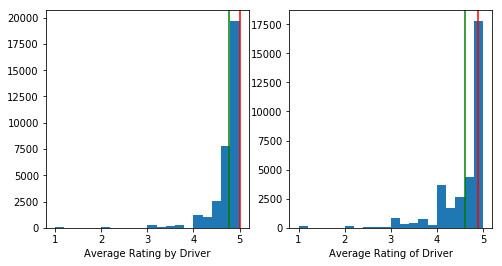

In [110]:
fig, ax = plt.subplots(1,2, figsize = (8,4))

x0 = nona.avg_rating_by_driver
x1 = nona.avg_rating_of_driver

ax[0].hist(x0, bins = 20)
ax[0].axvline(np.mean(x0), color = 'green')
ax[0].axvline(np.median(x0), color = 'red')
ax[0].set_xlabel('Average Rating by Driver')

ax[1].hist(x1, bins = 20)
ax[1].axvline(np.mean(x1), color = 'green')
ax[1].axvline(np.median(x1), color = 'red')
ax[1].set_xlabel('Average Rating of Driver')

ax[0].legend([axvline], ['mean', 'median'])
;

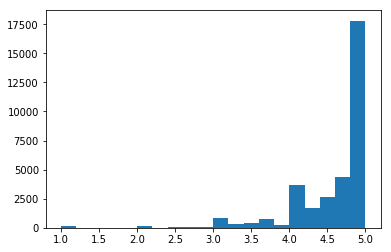

In [48]:
plt.hist(nona.avg_rating_of_driver, bins = 20);

In [89]:
np.median(nona.avg_rating_of_driver)

4.9

In [90]:
np.median(nona.avg_rating_by_driver)

5.0

In [51]:
np.unique(nona.avg_rating_by_driver)

array([1. , 1.5, 2. , 2.3, 2.5, 2.7, 2.8, 3. , 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. ])

In [52]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [75]:
categoricals = ['city','phone','luxury_car_user']
print('variable         categories')
for i in categoricals:
    print('{0}: {1}'.format(i,np.unique(nona[i])))

variable         categories
city: ['Astapor' "King's Landing" 'Winterfell']
phone: ['Android' 'iPhone']
luxury_car_user: [False  True]


In [65]:
np.max(nona.last_trip_date)

'2014-07-01'

In [66]:
np.max(nona.signup_date)

'2014-01-31'

In [67]:
np.min(nona.signup_date)

'2014-01-01'

In [95]:
nona.city.value_counts()

Winterfell        15265
Astapor           10824
King's Landing     7043
Name: city, dtype: int64

In [107]:
nona.luxury_car_user.value_counts()

False    20447
True     12685
Name: luxury_car_user, dtype: int64

In [102]:
int(nona.signup_date[0][:7][5:])

1

AttributeError: type object 'scipy.interpolate.interpnd.array' has no attribute '__reduce_cython__'

In [ ]:
int(nona.signup_date[0][:7][5:])